In [215]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df=pd.read_csv('./global_terror_data_proj_1.csv')

In [53]:
df.head()

,iyear,imonth,iday,country_txt,summary,success,attacktype1,attacktype1_txt,target1,targtype1_txt,claimed,gname,weaptype1,weaptype1_txt,nkill
0,1986,2,28,Sweden,2/28/1986: Prime Minister Olof Palme was shot ...,1,2,Armed Assault,Olof Palme,Government (General),1.0,Unknown,5,Firearms,1.0
1,1985,1,0,West Germany (FRG),NaN,0,3,Bombing/Explosion,Headquarters,Military,NaN,Unknown,6,Explosives,0.0
2,1985,1,0,France,NaN,1,9,Unknown,Police Headquarters,Police,NaN,Unknown,13,Unknown,1.0
3,1985,1,0,France,NaN,1,9,Unknown,unknown,Unknown,NaN,Unknown,13,Unknown,0.0
4,1985,1,0,France,NaN,1,9,Unknown,unknown,Unknown,NaN,Unknown,13,Unknown,0.0


In [70]:
ter_df = df[["country_txt", "attacktype1_txt", "attacktype1", "targtype1_txt"]]
ter_df.head()

,country_txt,attacktype1_txt,attacktype1,targtype1_txt
0,Sweden,Armed Assault,2,Government (General)
1,West Germany (FRG),Bombing/Explosion,3,Military
2,France,Unknown,9,Police
3,France,Unknown,9,Unknown
4,France,Unknown,9,Unknown


In [71]:
G=nx.from_pandas_dataframe(ter_df, "country_txt", "attacktype1_txt", "targtype1_txt")
print (nx.info(G))

Name: 
Type: Graph
Number of nodes: 204
Number of edges: 1226
Average degree:  12.0196


In [56]:
from pyvis import network as net
N = net.Network(
                bgcolor='#222222', font_color='white', 
               notebook=True)
N.barnes_hut()
for n in G.nodes():
    N.add_node(n)
for e in G.edges():
    N.add_edge(e[0], e[1])

In [57]:
#N.show('test.html')

In [74]:
us_involved = ["Syria", "Turkey", "Iraq", 
               "Pakistan", "Afghanistan", "Jordan"]
ter_df_2 =  ter_df[ter_df.country_txt.isin(us_involved)]
ter_df_2.head()

,country_txt,attacktype1_txt,attacktype1,targtype1_txt
1652,Pakistan,Bombing/Explosion,3,Airports & Aircraft
1653,Pakistan,Bombing/Explosion,3,Government (General)
1748,Turkey,Assassination,1,Government (Diplomatic)
1776,Syria,Bombing/Explosion,3,Journalists & Media
2026,Turkey,Bombing/Explosion,3,Airports & Aircraft


In [75]:
H=nx.from_pandas_dataframe(ter_df_2,
                           "country_txt", 
                           "attacktype1_txt",
                          "targtype1_txt")
N_2 = net.Network(bgcolor='#222222',
                  font_color='white',
                  height='1000px',
                  width='1000px',
                  notebook=True)
N_2.barnes_hut()
for n in H.nodes():
    N_2.add_node(n)
for e in H.edges():
    N_2.add_edge(e[0], e[1])
#N_2.show('test_2.html')

In [190]:
node_1 = [node[0] for node in H.edges()]
node_2 = [node[1] for node in H.edges()]
attr_node = [H.get_edge_data(H.edges()[i][0],
                             H.edges()[i][1])['targtype1_txt']
            for i in range(len(H.edges()))]
data = zip(node_1, node_2, attr_node)
test_df = pd.DataFrame(data=data,
                      columns= ["source", "target", "type"])

In [266]:
eigen_H = nx.eigenvector_centrality_numpy(H)
eigen_sort = sorted(eigen_H.items(),
       key=lambda x:x[1],
       reverse=True)
eigen_df = pd.DataFrame(eigen_sort, 
                        columns=['node', 'ev'])
eigen_df.head()

,node,ev
0,Turkey,0.30198
1,Syria,0.30198
2,Afghanistan,0.30198
3,Iraq,0.30198
4,Pakistan,0.30198


In [211]:
eigen_list = eigen_df[eigen_df.ev > .24].node.to_list()
test_df = test_df[test_df.source.isin(eigen_list)] 

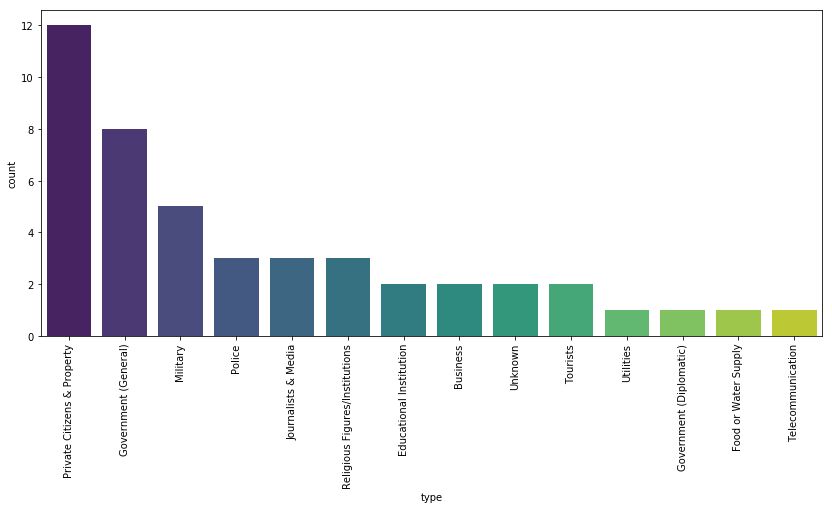

In [258]:
plt.figure(figsize=(14,6))
sns.countplot(data=test_df, 
              x='type',
              palette='viridis',
              order=test_df.type.value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [267]:
degree_H = nx.degree_centrality(H)
degree_sort = sorted(degree_H.items(),
      key=lambda x:x[1], 
      reverse=True)
degree_df = pd.DataFrame(degree_sort, columns=['node', 'dc'])
degree_df.head()

,node,dc
0,Pakistan,0.642857
1,Turkey,0.642857
2,Syria,0.642857
3,Afghanistan,0.642857
4,Iraq,0.642857


In [263]:
degree_list = degree_df[degree_df.dc > .50].node.to_list()
test_df = test_df[test_df.source.isin(degree_list)] 

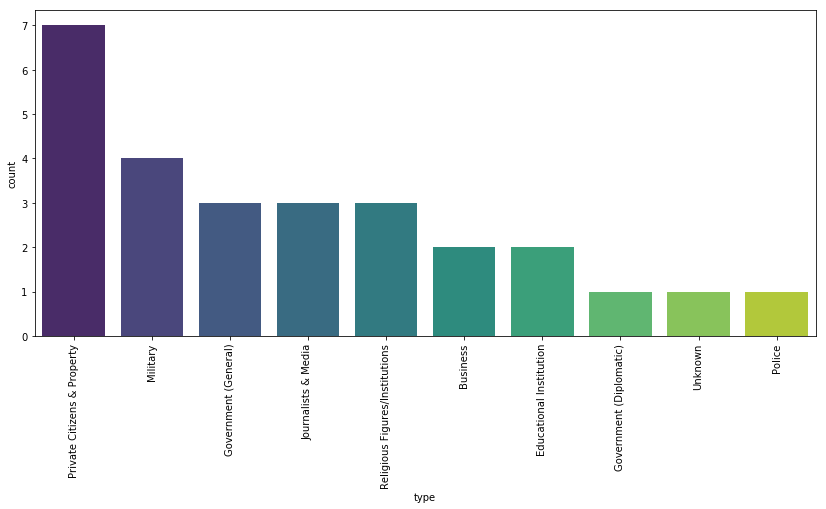

In [264]:
plt.figure(figsize=(14,6))
sns.countplot(data=test_df, 
              x='type',
              palette='viridis',
              order=test_df.type.value_counts().index)
plt.xticks(rotation=90)
plt.show()

/Users/jeffshamp/.conda/envs/sps620/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jeffshamp/.conda/envs/sps620/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/jeffshamp/.conda/envs/sps620/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Users/jeffshamp/.conda/envs/sps620/lib/python3.7/site-packages/netwo

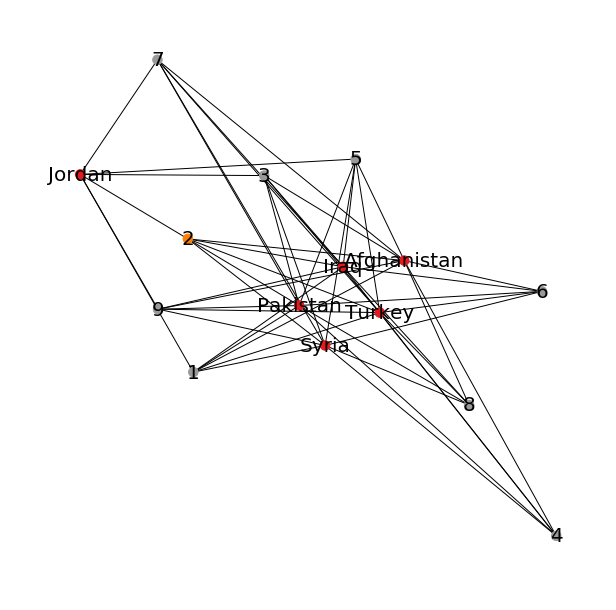

In [265]:
ter_df_sub =  ter_df[ter_df.country_txt.isin(us_involved)]
ter_df_sub['ID'] = np.arange(len(ter_df_sub))
catv = ter_df_sub.filter(["attacktype1"], axis=1)
catv['ID'] = catv.reset_index().index
G = nx.from_pandas_dataframe(ter_df_sub, 
                           'country_txt', 
                           'attacktype1', 
                           create_using=nx.Graph() )
catv = catv.set_index('ID')
catv = catv.reindex(G.nodes())
catv['attacktype1'] = pd.Categorical(catv['attacktype1'])
plt.figure(figsize=(8,8))
nx.draw(G, with_labels=True,
        node_color=catv['attacktype1'].cat.codes, 
        cmap=plt.cm.Set1, 
        node_size=90, font_size=20)
plt.show()